Shape: (3000, 20)
Columns: ['participant_id', 'day', 'PSS_score', 'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism', 'sleep_time', 'wake_time', 'sleep_duration', 'PSQI_score', 'call_duration', 'num_calls', 'num_sms', 'screen_on_time', 'skin_conductance', 'accelerometer', 'mobility_radius', 'mobility_distance']

Missing values:
 participant_id       0
day                  0
PSS_score            0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
sleep_time           0
wake_time            0
sleep_duration       0
PSQI_score           0
call_duration        0
num_calls            0
num_sms              0
screen_on_time       0
skin_conductance     0
accelerometer        0
mobility_radius      0
mobility_distance    0
dtype: int64
First 5 rows:
   participant_id  day  PSS_score  Openness  Conscientiousness  Extraversion  \
0               1    1         34  2.322732           4.332193      1.185

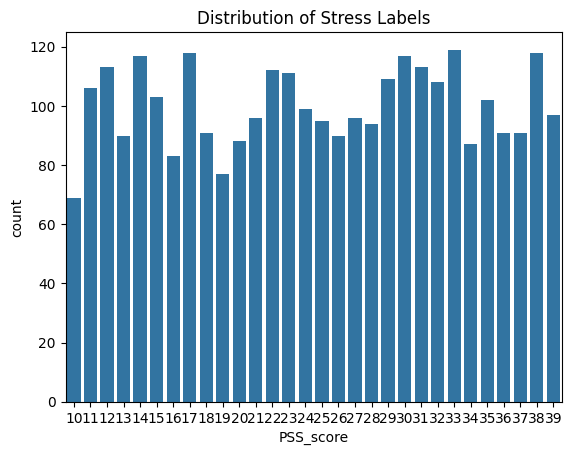

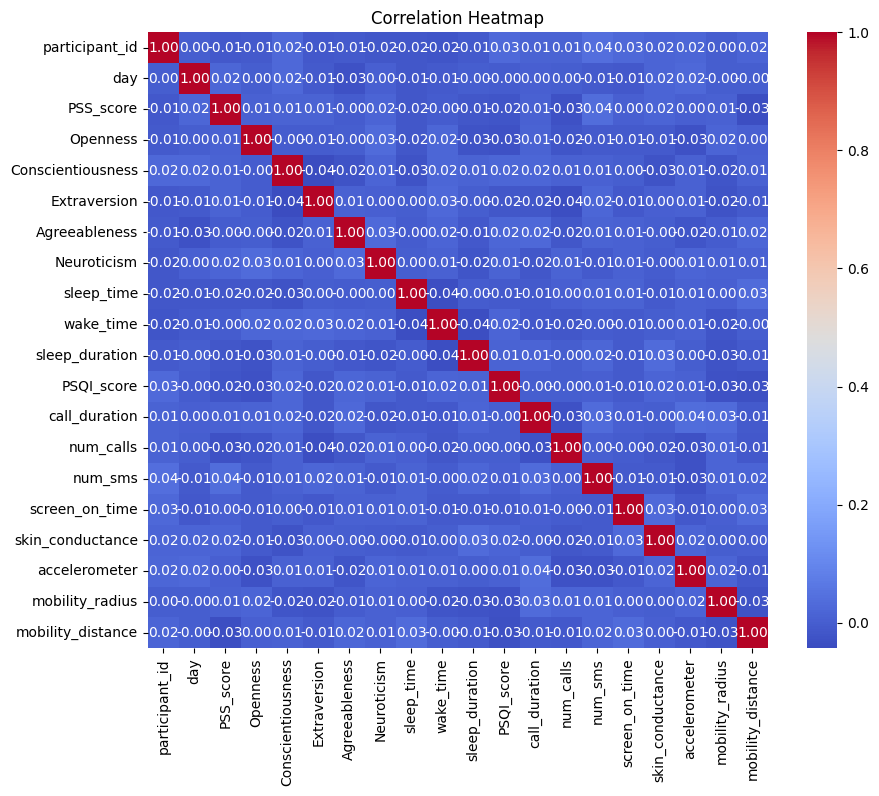

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Data/stress_detection.csv")  # Adjust the filename if it's different

# Show basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Display the first few rows
print("First 5 rows:")
print(df.head())

# Display column names and basic info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the class distribution
sns.countplot(data=df, x='PSS_score')  
plt.title('Distribution of Stress Labels')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



PSS Score Description:
 count    3000.000000
mean       24.701000
std         8.615781
min        10.000000
25%        17.000000
50%        25.000000
75%        32.000000
max        39.000000
Name: PSS_score, dtype: float64


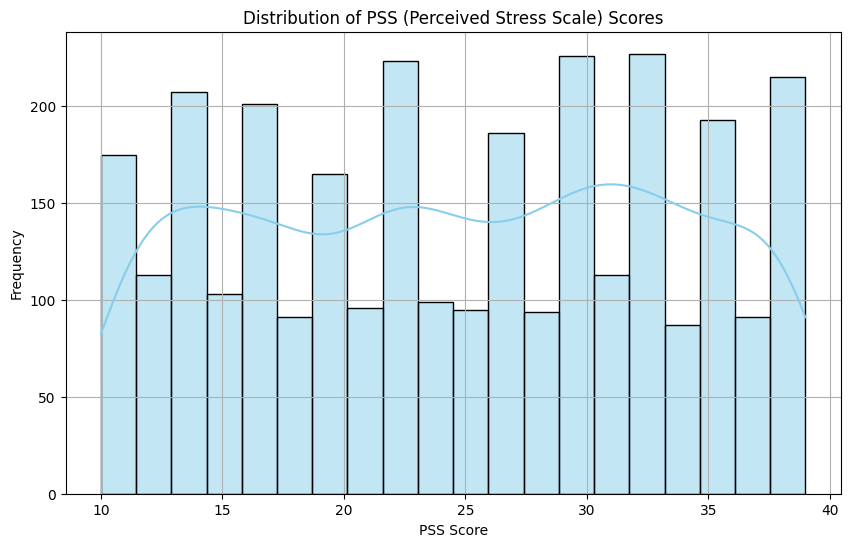

In [24]:
# Describe PSS score
print("\nPSS Score Description:\n", df['PSS_score'].describe())

# Plot the distribution of PSS scores
plt.figure(figsize=(10,6))
sns.histplot(df['PSS_score'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of PSS (Perceived Stress Scale) Scores")
plt.xlabel("PSS Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


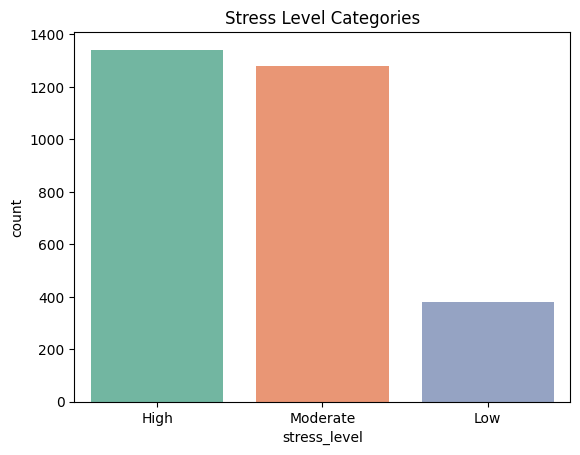

In [25]:
# Create stress level categories
def categorize_stress(score):
    if score < 14:
        return 'Low'
    elif score < 27:
        return 'Moderate'
    else:
        return 'High'

df['stress_level'] = df['PSS_score'].apply(categorize_stress)

# Visualize the counts
sns.countplot(x='stress_level', data=df, palette='Set2')
plt.title("Stress Level Categories")
plt.show()


Shape: (3000, 20)
Columns: ['participant_id', 'day', 'PSS_score', 'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism', 'sleep_time', 'wake_time', 'sleep_duration', 'PSQI_score', 'call_duration', 'num_calls', 'num_sms', 'screen_on_time', 'skin_conductance', 'accelerometer', 'mobility_radius', 'mobility_distance']
   participant_id  day  PSS_score  Openness  Conscientiousness  Extraversion  \
0               1    1         34  2.322732           4.332193      1.185878   
1               1    2         37  1.761436           3.254120      3.907281   
2               1    3         30  3.025887           1.855002      2.045900   
3               1    4         16  1.948370           4.966676      3.345225   
4               1    5         32  3.343484           2.065936      3.137843   

   Agreeableness  Neuroticism  sleep_time  wake_time  sleep_duration  \
0       1.570213     3.782094    7.726792   5.190660        6.572069   
1       4.072512     1.997145    

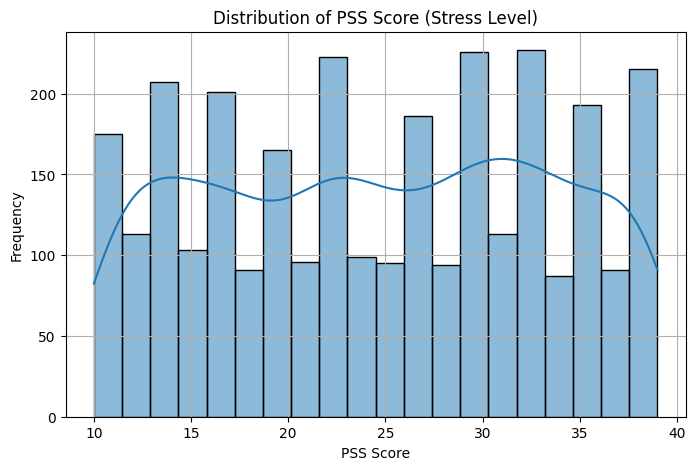

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df["PSS_score"], bins=20, kde=True)
plt.title("Distribution of PSS Score (Stress Level)")
plt.xlabel("PSS Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [27]:
# Create a new column 'label' for stress classification
threshold = df["PSS_score"].median()
df["label"] = (df["PSS_score"] > threshold).astype(int)

print(df["label"].value_counts())


label
0    1568
1    1432
Name: count, dtype: int64


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop non-feature columns
features = df.drop(columns=["participant_id", "day", "PSS_score", "label"])
target = df["label"]

# Remove categorical (non-numeric) columns from features
features = features.select_dtypes(include=['number'])

# Match the target to features after dropna
target = target[features.index]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict
y_pred = clf.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.60      0.56       313
           1       0.49      0.43      0.46       287

    accuracy                           0.52       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.52      0.51       600


Confusion Matrix:
 [[188 125]
 [165 122]]


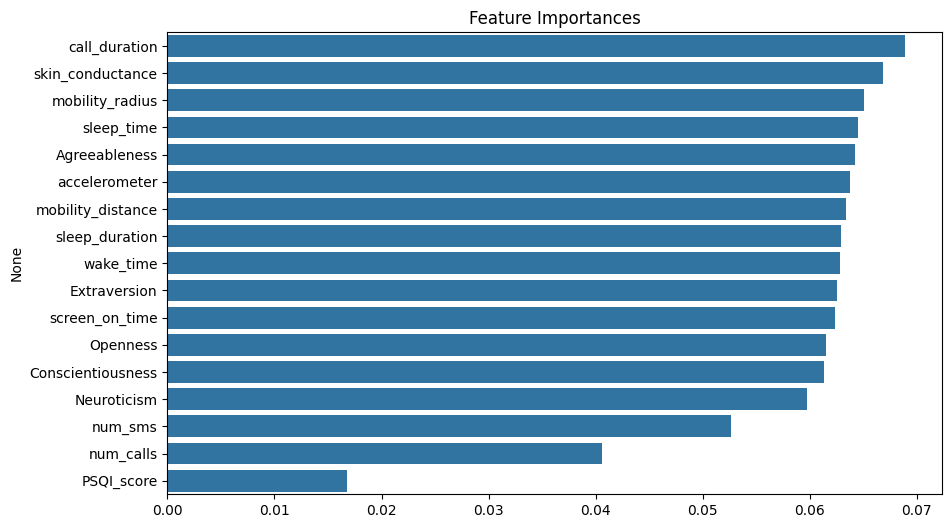

In [36]:
import numpy as np

# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importances")
plt.show()


In [16]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.4/150.0 MB 12.1 MB/s eta 0:00:13
   - -------------------------------------- 4.7/150.0 MB 11.9 MB/s eta 0:00:13
   - -------------------------------------- 7.3/150.0 MB 11.9 MB/s eta 0:00:13
   -- ------------------------------------- 9.7/150.0 MB 11.9 MB/s eta 0:00:12
   --- ------------------------------------ 12.3/150.0 MB 11.9 MB/s eta 0:00:12
   --- ------------------------------------ 14.9/150.0 MB 11.9 MB/s eta 0:00:12
   ---- ----------------------------------- 17.6/150.0 MB 11.9 MB/s eta 0:00:12
   ----- ---------------------------------- 20.2/150.0 MB 11.9 MB/s eta 0:00:11
   ------ --------------------------------- 22.5/150.0 MB 11.9 MB/s eta 0:00:11
   ------ --------------------------------- 25.2/150.0 MB 11.9 MB/s eta 0:00:11
   ------- -------------------------------- 27.8/150.0 


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\fsepehrm24\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


XGBoost Accuracy: 0.53

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54       313
           1       0.51      0.53      0.52       287

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600


Confusion Matrix:
 [[165 148]
 [134 153]]


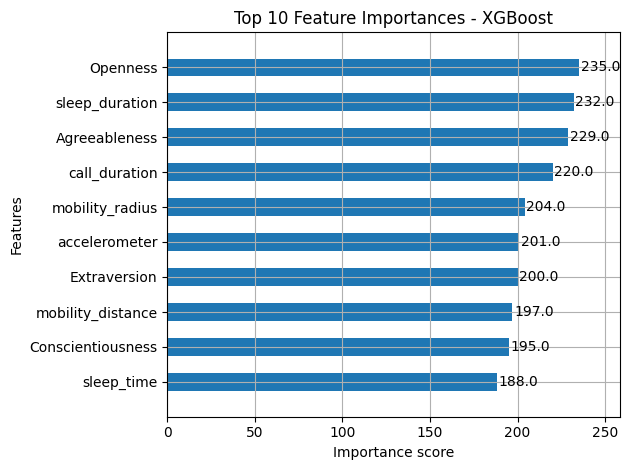

In [42]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# OPTIONAL: Scale using DataFrame to keep feature names
# If you already scaled with NumPy, you can wrap back with DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model with DataFrame to retain feature names
xgb_clf.fit(X_train_scaled_df, y_train)

# Predict
y_pred_xgb = xgb_clf.predict(X_test_scaled_df)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Plot feature importances with correct feature names
xgb.plot_importance(xgb_clf, height=0.5, max_num_features=10)
plt.title("Top 10 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()
